In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from sklearn import preprocessing 

## NN based approach for electron energy regression

A neural network is made with X structure from the keras framework

What to implement 
* Cross-Validation
* Hyperparameter optimisation

# Data imports

In [2]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        return pd.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('data/train')
test  = load_data('data/test')

# Select only true electrons for energy regression
train_mask = train['Truth'][:130000] == 1
validate_mask = train['Truth'][130000:] == 1

#scaler_train = preprocessing.StandardScaler().fit_transform(train)
#scaler_test = preprocessing.StandardScaler().fit_transform(test)
#train = pd.DataFrame(scaler_train, columns = train.columns)
#test = pd.DataFrame(scaler_test, columns = test.columns)

# Variable list from https://www.nbi.dk/~petersen/Teaching/ML2023/InitialProject/VariableList.html
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]


X_train = train[all_variables][:130000]
y_train = train['p_truth_E'][:130000]
X_validate = train[all_variables][130000:]
y_validate = train['p_truth_E'][130000:]
X_test = test[all_variables]

with open('Classification_JuliusFoverskov_XGBoost_VariableList.txt','r') as f:
    sorted_variables = [item.strip() for item in f]

# Only pick 15 most important features for clustering, importances optained from permutation importance
sorted_variables = sorted_variables[:15]

X_train = X_train[sorted_variables]
X_validate = X_validate[sorted_variables]



# NN - Setup

In [3]:
# set up the network hyperparameters
n_inputs = 15
n_hidden1 = 10
n_hidden2 = 10
n_outputs = 1
batch_norm_momentum = 0.9
learning_rate = 0.066
init = tf.keras.initializers.VarianceScaling(scale=1.0, mode='fan_in')
mse = tf.keras.losses.MeanSquaredError()

# network structure
nn_reg = tf.keras.models.Sequential([
  Flatten(input_shape=(15, 1)),
  Dense(n_hidden1, activation='ReLU'),
  BatchNormalization(momentum=batch_norm_momentum, center=True, scale=True),
  Dense(n_hidden2, activation='ReLU'),
  BatchNormalization(momentum=batch_norm_momentum, center=True, scale=True),
  Dense(n_outputs, activation='ReLU'),
  BatchNormalization(momentum=batch_norm_momentum, center=True, scale=True)
])

nn_reg.compile(loss=mse, optimizer=SGD(learning_rate), metrics=['mse'])

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import VarianceScaling
from tensorflow.keras.losses import MeanSquaredError
from kerastuner.tuners import RandomSearch

def build_model(hp):
    n_inputs = 15
    n_hidden1 = hp.Int('n_hidden1', min_value=5, max_value=20, step=5)
    n_hidden2 = hp.Int('n_hidden2', min_value=5, max_value=20, step=5)
    n_outputs = 1
    batch_norm_momentum = 0.9 #hp.Float('batch_norm_momentum', min_value = 0.3, max_value = 0.99, step = 0.3)
    learning_rate = hp.Float('learning_rate', min_value = 0.001, max_value = 0.1, step = 0.005)

    model = Sequential([
        Flatten(input_shape=(15, 1)),
        Dense(n_hidden1, activation='relu'),
        BatchNormalization(momentum=batch_norm_momentum, center=True, scale=True),
        Dense(n_hidden2, activation='relu'),
        BatchNormalization(momentum=batch_norm_momentum, center=True, scale=True),
        Dense(n_outputs, activation='relu'),
        BatchNormalization(momentum=batch_norm_momentum, center=True, scale=True)
    ])

    model.compile(
        loss=MeanSquaredError(),
        optimizer=SGD(learning_rate),
        metrics=['mse']
    )

    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='hyperparameter_tuning',
    project_name='nn_regression'
)

# Define your input data and target variable
# X_train, y_train = ...
# X_val, y_val = ...

tuner.search(x=X_train, y=y_train,
             epochs=4,
             validation_data=(X_validate, y_validate))

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(best_hyperparameters.values)


INFO:tensorflow:Reloading Tuner from hyperparameter_tuning\nn_regression\tuner0.json
INFO:tensorflow:Oracle triggered exit


C:\Users\Juliu\AppData\Local\Temp\ipykernel_16112\2660619519.py:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


Best Hyperparameters:
{'n_hidden1': 10, 'n_hidden2': 10, 'learning_rate': 0.066}


In [5]:
n_epochs = 12
batch_size = 200

history = nn_reg.fit(X_train[train_mask], y_train[train_mask], epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_validate[validate_mask], y_validate[validate_mask]))

Epoch 1/12
487/487 [==============================] - 2s 2ms/step - loss: 2210551296.0000 - mse: 2210551296.0000 - val_loss: 2055306368.0000 - val_mse: 2055306368.0000
Epoch 2/12
487/487 [==============================] - 1s 2ms/step - loss: 2029329920.0000 - mse: 2029329920.0000 - val_loss: 2086921600.0000 - val_mse: 2086921600.0000
Epoch 3/12
487/487 [==============================] - 1s 2ms/step - loss: 2030600320.0000 - mse: 2030600320.0000 - val_loss: 2031724672.0000 - val_mse: 2031724672.0000
Epoch 4/12
487/487 [==============================] - 1s 2ms/step - loss: 2028587648.0000 - mse: 2028587648.0000 - val_loss: 2067163392.0000 - val_mse: 2067163392.0000
Epoch 5/12
487/487 [==============================] - 1s 2ms/step - loss: 2028252160.0000 - mse: 2028252160.0000 - val_loss: 2076405888.0000 - val_mse: 2076405888.0000
Epoch 6/12
487/487 [==============================] - 1s 2ms/step - loss: 2028732928.0000 - mse: 2028732928.0000 - val_loss: 2042436608.0000 - val_mse: 20424366

In [6]:
preds = nn_reg.predict(X_test[sorted_variables])

5021/5021 [==============================] - 4s 823us/step


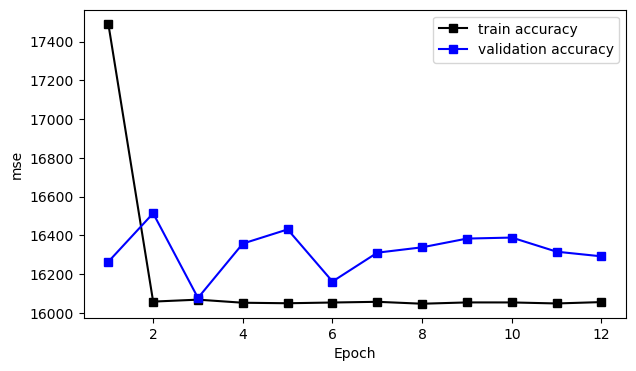

In [7]:
import os
# This is a hacky workaround to openMP libs being linked multiple times to the runtime, I have no idea why they are.
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(np.arange(n_epochs) + 1, np.array(history.history['mse']) / np.mean(y_train), 'ks-', label='train accuracy')
ax.plot(np.arange(n_epochs) + 1, np.array(history.history['val_mse']) / np.mean(y_train), 'bs-', label='validation accuracy')
ax.set_ylabel('mse')
ax.set_xlabel('Epoch')
ax.legend()


## Save to file

In [8]:
# Write results to a file

# Probabilities of particle being an electron
with open('Regression_JuliusFoverskov_TF-NN.txt','w') as f:
    # y_test_pred col 1 = electron probability
    for index, prediction in zip(X_test.index, preds[:, 0]):
        f.write(f"{index}, {prediction}\n")

# List of most important features from permutation importance for electron classification
with open('Regression_JuliusFoverskov_TF-NN_VariableList.txt','w') as f:
    f.write("\n".join(map(str, sorted_variables)))

# Residuals per individual datapoint

In [9]:
predictions = nn_reg.predict(X_train) # X is your input data
predictions = pd.Series(predictions[:, 0])
true_values = y_train  # y is your true output values

# Calculate residuals
residuals = true_values - predictions

# Compute MSE
mse = np.mean(np.square(residuals))

# Individual errors or residuals for each data point
print(residuals / np.mean(y_train))


4063/4063 [==============================] - 4s 874us/step
0        -0.133869
1        -1.045040
2        -0.769427
3         0.010329
4         0.021881
            ...   
129995   -0.030593
129996   -0.435590
129997   -0.034236
129998   -0.236083
129999    0.180823
Length: 130000, dtype: float64


In [10]:
scaler_test = preprocessing.StandardScaler().fit(test)
scaler_test.inverse_transform(test)

array([[2.80796514e+15, 6.00000000e+05, 7.64071795e+02, ...,
        4.52959352e+07, 4.65947577e+08, 8.03250000e+04],
       [2.97977234e+15, 6.00000000e+05, 4.88934079e+02, ...,
        1.59677703e+08, 1.65331505e+08, 1.26700949e+05],
       [3.00007837e+15, 6.00000000e+05, 1.74771547e+02, ...,
        3.83758448e+03, 5.73143049e+08, 1.73076898e+05],
       ...,
       [1.02109208e+15, 6.00000000e+05, 3.57978443e+02, ...,
        3.83758448e+03, 2.40811013e+08, 7.45028379e+09],
       [7.27613069e+14, 6.00000000e+05, 6.33116184e+02, ...,
        1.13686583e+08, 4.95812307e+08, 7.45033016e+09],
       [2.84652934e+15, 6.00000000e+05, 5.54542818e+02, ...,
        3.83758448e+03, 7.72662094e+08, 7.45037654e+09]])

(array([1.41250e+04, 1.15743e+05, 1.30000e+02, 2.00000e+00]),
 array([-2.91960254, -0.80787692,  1.3038487 ,  3.41557432,  5.52729995]),
 <BarContainer object of 4 artists>)

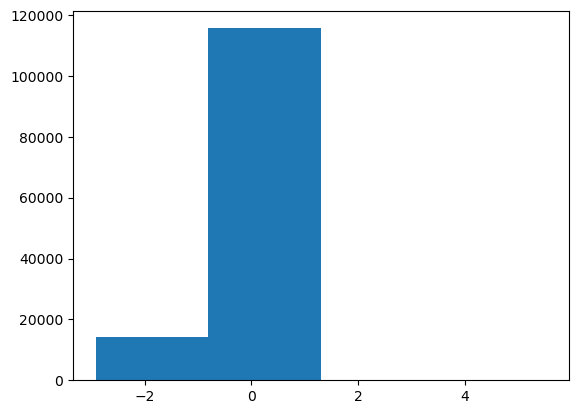

In [11]:
plt.hist(residuals / np.mean(y_train), bins = 4) 